# Module 12 Challenge | Web - Scraping

## Part 2 | Scrape & Analyze Mars Weather Data

In [52]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import json

In [53]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Visit the Website

In [54]:
# Visit the website https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

### Scrape the Table

In [57]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [58]:
# Extract all rows of data
table = soup.find('table', class_="table")
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Store the Data

In [7]:
# Create an empty list
table_facts = []

In [8]:
# confirm headers for the table
table_header = table.find_all('th')

headers = []
for header in table_header:
    title=header.text
    headers.append(title)
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# confirm DataFrame was created successfully
df = pd.DataFrame(columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [10]:
# Loop through the scraped data to create a list of rows
for row in table.find_all('tr', class_='data-row'):
    data = row.find_all('td')
    row_data=[td.text.strip() for td in data]
    length=len(df)
    df.loc[length]=row_data
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [59]:
#End the browser
browser.quit()

### Prepare Data for Analysis

In [12]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

In [14]:
# Confirm type changes were successful by examining data types again
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


### Analyze the Data

In [17]:
# 1. How many months are there on Mars?
month_total = df['month'].nunique()
print(f'There are', month_total,'months on Mars.')

There are 12 months on Mars.


In [18]:
# 2. How many Martian days' worth of data are there?
days = df['sol'].count()
print(f'There are', days, 'Martian days worth of data.')

There are 1867 Martian days worth of data.


In [21]:
# 3. What is the average low temperature by month?
avg_min_temp = []

for i in range(1, month_total+1):
    weather_per_month={"month":"", "avg_min_temp":""}
    avg_min_temp_month=df.loc[df['month']==i]['min_temp'].mean()
    round_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month"] = i
    weather_per_month["avg_min_temp"] = round_min_temp_month
    avg_min_temp.append(weather_per_month)
print(avg_min_temp)    

# exporting to json for easier read
mars_temp_json = json.dumps(avg_min_temp)
df_monthly_temp = pd.read_json(mars_temp_json)
df_monthly_temp

[{'month': 1, 'avg_min_temp': -77.0}, {'month': 2, 'avg_min_temp': -80.0}, {'month': 3, 'avg_min_temp': -83.0}, {'month': 4, 'avg_min_temp': -83.0}, {'month': 5, 'avg_min_temp': -79.0}, {'month': 6, 'avg_min_temp': -75.0}, {'month': 7, 'avg_min_temp': -72.0}, {'month': 8, 'avg_min_temp': -68.0}, {'month': 9, 'avg_min_temp': -69.0}, {'month': 10, 'avg_min_temp': -72.0}, {'month': 11, 'avg_min_temp': -72.0}, {'month': 12, 'avg_min_temp': -74.0}]


,month,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

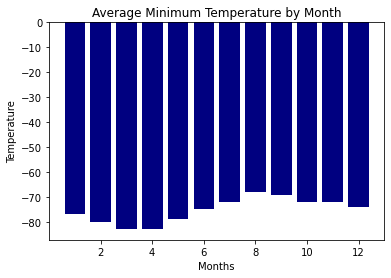

In [22]:
# Plot the average temperature by month
plt.bar(df_monthly_temp['month'], df_monthly_temp['avg_min_temp'], color = 'navy')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Average Minimum Temperature by Month")

In [23]:
# Identify the coldest hottest month
avg_min_temp = df_monthly_temp['avg_min_temp'].min()
min_temp_month = df_monthly_temp.loc[df_monthly_temp['avg_min_temp']==avg_min_temp]
min_temp_month

,month,avg_min_temp
2,3,-83
3,4,-83


Month number 3 and 4 are the coldest average minimum monthly temperatures, which is -83.

In [24]:
# Identify the hottest months 
avg_min_temp = df_monthly_temp['avg_min_temp'].max()
max_temp_month = df_monthly_temp.loc[df_monthly_temp['avg_min_temp']==avg_min_temp]
max_temp_month

,month,avg_min_temp
7,8,-68


The warmest Martian month, would be month 8 with an average minimum temperature of -68.
It is only 15 degrees warmer on average than the coldest months. 

In [31]:
# 4. Average pressure by Martian month
df_month = df.groupby('month')
df_pressure_month = df_month.mean().loc[:,['pressure']]
df_pressure_month

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [34]:
# Identify the lowest pressure month
avg_pressure = df_pressure_month['pressure'].min()
min_pressure = df_pressure_month.loc[df_pressure_month['pressure']==avg_pressure]
min_pressure

,pressure
month,
6,745.054422


The lowest pressure Martian month is month 6, with an average pressure of 745.05.

In [35]:
# Identify the highest pressure month
avg_pressure = df_pressure_month['pressure'].max()
max_pressure = df_pressure_month.loc[df_pressure_month['pressure']==avg_pressure]
max_pressure

,pressure
month,
9,913.30597


The highest pressure Martian month is mont 9, with an average pressure of 913.31.

Text(0.5, 1.0, 'Average Pressure by Month')

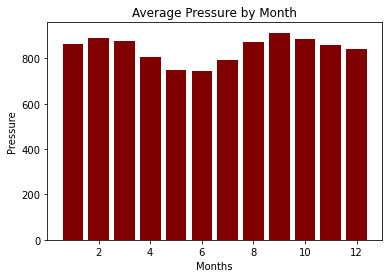

In [40]:
# Plot the average pressure by month
x = range(1,13)
plt.bar(x, df_pressure_month['pressure'], color = 'maroon')
plt.xlabel("Months")
plt.ylabel("Pressure")
plt.title("Average Pressure by Month")

In [46]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# start by finding the sun's longitude.
starting_long = df['ls'].loc[0]

# determined the next rows to create the same (original) staring longitude
sun_long = df.loc[df['ls']==long]
sun_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [48]:
# 5. How many terrestrial (earth) days are there in a Martian year?
my = sun_long['terrestrial_date'].loc[0]
martial_year_end = sun_long['terrestrial_date'].iloc[1]
martial_year = martial_year_end - my
print(f'One Martial year is ',martial_year, 'Earth days.')

One Martial year is  686 days 00:00:00 Earth days.


Text(0.5, 1.0, 'Daily Minimum Temperatures')

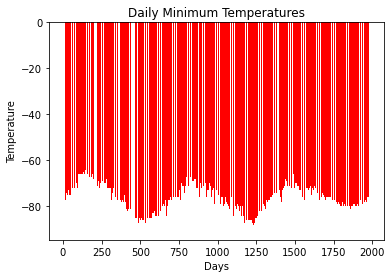

In [50]:
# Creating a ploting of the daily minimum temperatures.
plt.bar(df['sol'], df['min_temp'], color = 'red')
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Daily Minimum Temperatures")

When looking at this graph, you can see the over the data set (2000 Martian days) it appears to travel around the sun 3 times; as the temperature becomes highest as it is closest to the sun.

### Save the Data

In [51]:
# Write the data to a CSV
df.to_csv('mars_data_table.csv', index=False)